Libraries (Always run first)

In [24]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

Task 1

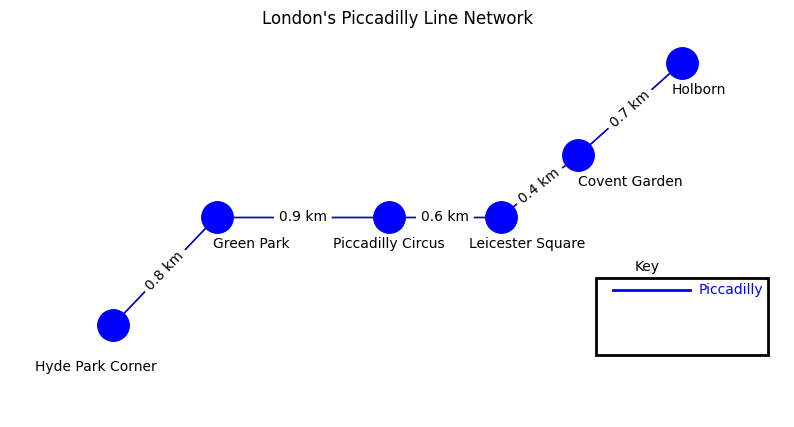

In [25]:
#Create the graph
MyGraph = nx.Graph()

# Add nodes with updated positions to reflect the distances proportionally
MyGraph.add_node('Hyde Park Corner', npos=(1, 1))
MyGraph.add_node('Green Park', npos=(7, 8))
MyGraph.add_node('Piccadilly Circus', npos=(17, 8))
MyGraph.add_node('Leicester Square', npos=(23.5, 8))
MyGraph.add_node('Covent Garden', npos=(28, 12))
MyGraph.add_node('Holborn', npos=(34, 18))

# Add edges with distances
MyGraph.add_edge('Hyde Park Corner', 'Green Park', distance=0.8)  # 0.8 km
MyGraph.add_edge('Green Park', 'Piccadilly Circus', distance=0.9)  # 0.9 km
MyGraph.add_edge('Piccadilly Circus', 'Leicester Square', distance=0.6)  # 0.6 km
MyGraph.add_edge('Leicester Square', 'Covent Garden', distance=0.4)  # 0.4 km
MyGraph.add_edge('Covent Garden', 'Holborn', distance=0.7)  # 0.7 km

# Extract attributes from the graph to dictionaries
pos = nx.get_node_attributes(MyGraph, 'npos')
edge_distances = nx.get_edge_attributes(MyGraph, 'distance')

# Create a dictionary with edge labels including 'km'
edge_labels = {(u, v): f"{d} km" for u, v, d in MyGraph.edges(data='distance')}

plt.figure(figsize=(10, 5))

# Draw the graph's nodes
nx.draw_networkx_nodes(MyGraph, pos, node_color='blue', node_size=500)

# Draw the graph
nx.draw_networkx(MyGraph, pos, node_color='blue', node_size=500, with_labels=False)
nx.draw_networkx_edges(MyGraph, pos, edge_color='blue')

# Add labels to the edges
nx.draw_networkx_edge_labels(MyGraph, pos, edge_labels=edge_labels, font_size=10)

# Add node labels
labels = {'Hyde Park Corner': (0, -2), 'Green Park': (9, 6), 'Piccadilly Circus': (17, 6), 
          'Leicester Square': (25, 6), 'Covent Garden': (31, 10), 'Holborn': (35, 16)}
for node, (x, y) in labels.items():
    plt.text(x, y, node, fontsize=10, ha='center')

# Add the key
plt.plot([34.5, 30], [3.25, 3.25], color='blue', linewidth=2)  # Blue line in the key
plt.text(35, 3, 'Piccadilly', fontsize=10, color='blue')  # Text in the key
plt.text(32, 4.5, 'Key', fontsize=10, ha='center')  # Key label
plt.gca().add_patch(plt.Rectangle((29, -1), 10, 5, fill=None, edgecolor='black', lw=2))  # Rectangle around the key

# Adjust the layout
plt.xlim(-5, 40)
plt.ylim(-5, 20)
plt.axis('off')

# Add the title
plt.title("London's Piccadilly Line Network")

plt.show()

Task 2

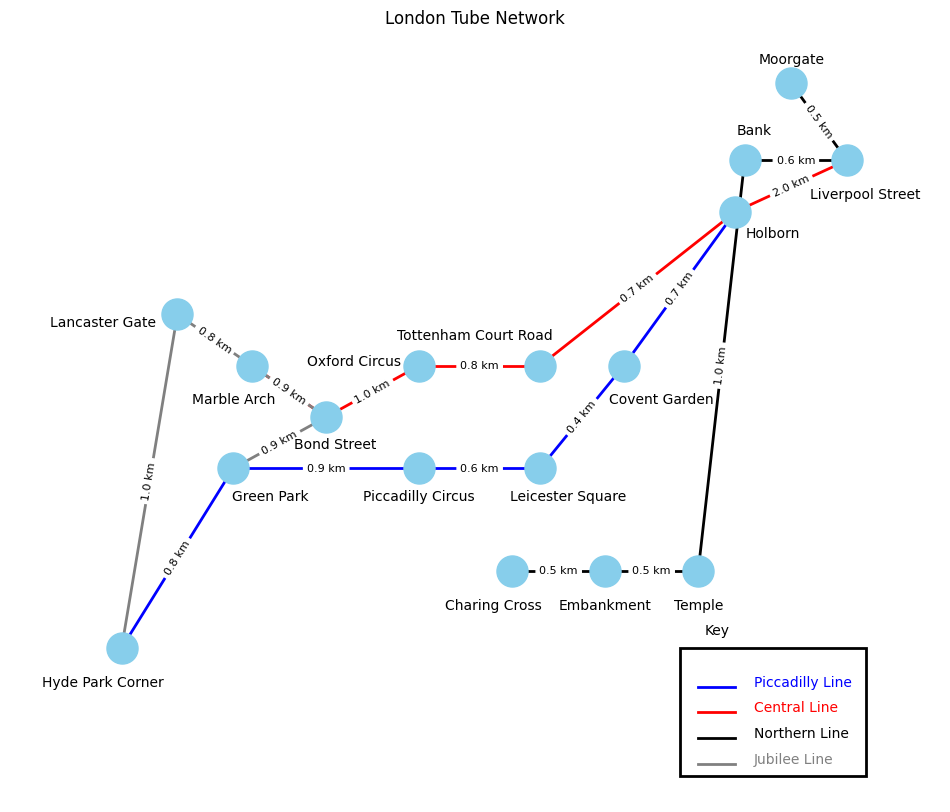

In [26]:

# Create the graph
LondonTube = nx.Graph()

# Define positions for nodes
node_positions = {
    'Hyde Park Corner': (1, 1),
    'Green Park': (7, 8),
    'Piccadilly Circus': (17, 8),
    'Leicester Square': (23.5, 8),
    'Covent Garden': (28, 12),
    'Holborn': (34, 18),
    'Oxford Circus': (17, 12),
    'Tottenham Court Road': (23.5, 12),
    'Charing Cross': (22, 4),
    'Embankment': (27, 4),
    'Temple': (32, 4),
    'Bank': (34.5, 20),
    'Liverpool Street': (40, 20),
    'Moorgate': (37, 23),
    'Bond Street': (12, 10),
    'Marble Arch': (8, 12),
    'Lancaster Gate': (4, 14)
}

# Add nodes to the graph with positions
LondonTube.add_nodes_from(node_positions.keys())
nx.set_node_attributes(LondonTube, node_positions, 'pos')

# Define edges with distances
tube_lines = [
    # Piccadilly Line (Blue)
    [('Hyde Park Corner', 'Green Park', {'distance': 0.8}), 
     ('Green Park', 'Piccadilly Circus', {'distance': 0.9}),
     ('Piccadilly Circus', 'Leicester Square', {'distance': 0.6}),
     ('Leicester Square', 'Covent Garden', {'distance': 0.4}),
     ('Covent Garden', 'Holborn', {'distance': 0.7})],

    # Central Line (Red)
    [('Marble Arch', 'Bond Street', {'distance': 0.8}),
     ('Bond Street', 'Oxford Circus', {'distance': 1.0}),
     ('Oxford Circus', 'Tottenham Court Road', {'distance': 0.8}),
     ('Tottenham Court Road', 'Holborn', {'distance': 0.7}),
     ('Holborn', 'Liverpool Street', {'distance': 2.0})],
    
    # Northern Line (Black)
    [('Charing Cross', 'Embankment', {'distance': 0.5}),
     ('Embankment', 'Temple', {'distance': 0.5}),
     ('Temple', 'Bank', {'distance': 1.0}),
     ('Bank', 'Liverpool Street', {'distance': 0.6}),
     ('Liverpool Street', 'Moorgate', {'distance': 0.5})],
    
    # Jubilee Line (Grey)
    [('Green Park', 'Bond Street', {'distance': 0.9}),
     ('Bond Street', 'Marble Arch', {'distance': 0.9}),
     ('Marble Arch', 'Lancaster Gate', {'distance': 0.8}),
     ('Lancaster Gate', 'Hyde Park Corner', {'distance': 1.0})]
]

# Add edges to the graph
for line in tube_lines:
    LondonTube.add_edges_from(line)

# Extract attributes from the graph
pos = nx.get_node_attributes(LondonTube, 'pos')
edge_distances = nx.get_edge_attributes(LondonTube, 'distance')

# Create edge labels
edge_labels = {(u, v): f"{d} km" for (u, v, d) in LondonTube.edges(data='distance')}

# Define line colors for the map
line_colors = {
    'Piccadilly': 'blue',
    'Central': 'red',
    'Northern': 'black',
    'Jubilee': 'grey'
}

# Draw the graph
plt.figure(figsize=(12, 10))

# Draw nodes
nx.draw_networkx_nodes(LondonTube, pos, node_color='skyblue', node_size=500)

# Draw edges with different colors
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[0], edge_color=line_colors['Piccadilly'], width=2)
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[1], edge_color=line_colors['Central'], width=2)
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[2], edge_color=line_colors['Northern'], width=2)
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[3], edge_color=line_colors['Jubilee'], width=2)

# Draw edge labels
nx.draw_networkx_edge_labels(LondonTube, pos, edge_labels=edge_labels, font_size=8)

# Draw node labels with coordinates
labels = {
    'Hyde Park Corner': (0, -0.5), 
    'Green Park': (9, 6.75), 
    'Piccadilly Circus': (17, 6.75), 
    'Leicester Square': (25, 6.75), 
    'Covent Garden': (30, 10.5), 
    'Holborn': (36, 17),
    'Oxford Circus': (13.5, 12),
    'Tottenham Court Road': (20, 13),
    'Charing Cross': (21, 2.5),
    'Embankment': (27, 2.5),
    'Temple': (32, 2.5),
    'Bank': (35, 21),
    'Liverpool Street': (41, 18.5),
    'Moorgate': (37, 23.75),
    'Bond Street': (12.5, 8.75),
    'Marble Arch': (7, 10.5),
    'Lancaster Gate': (0, 13.5)
}
for node, (x, y) in labels.items():
    plt.text(x, y, node, fontsize=10, ha='center')
    

# Add the key
key_positions = {
    'Piccadilly': (35, -0.5),
    'Central': (35, -1.5),
    'Northern': (35, -2.5),
    'Jubilee': (35, -3.5)
}

for line, (x, y) in key_positions.items():
    plt.plot([x-3, x-1], [y, y], color=line_colors[line], linewidth=2)
    plt.text(x, y, f"{line} Line", fontsize=10, color=line_colors[line])

plt.text(33, 1.5, 'Key', fontsize=10, ha='center')
plt.gca().add_patch(plt.Rectangle((31,-4), 10, 5, fill=None, edgecolor='black', lw=2))

# Add a title
plt.title("London Tube Network")

plt.xlim(-5, 45)
plt.ylim(-5, 25)
plt.axis('off')
plt.show()


Task 3

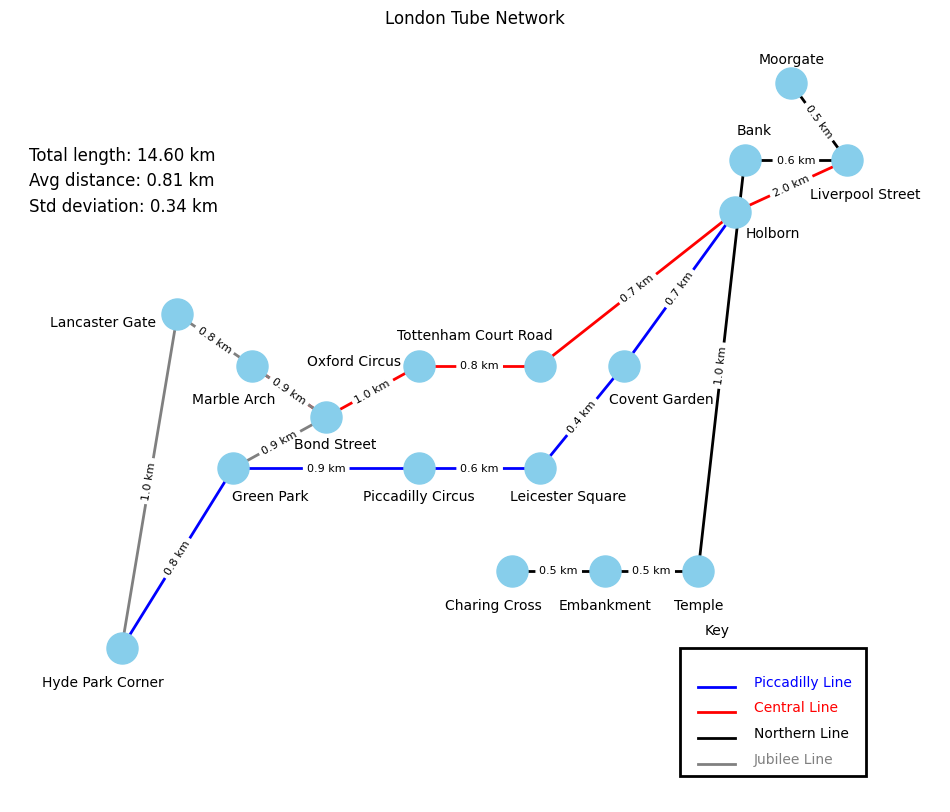

In [27]:
# Create the graph
LondonTube = nx.Graph()

# Define positions for nodes
node_positions = {
    'Hyde Park Corner': (1, 1),
    'Green Park': (7, 8),
    'Piccadilly Circus': (17, 8),
    'Leicester Square': (23.5, 8),
    'Covent Garden': (28, 12),
    'Holborn': (34, 18),
    'Oxford Circus': (17, 12),
    'Tottenham Court Road': (23.5, 12),
    'Charing Cross': (22, 4),
    'Embankment': (27, 4),
    'Temple': (32, 4),
    'Bank': (34.5, 20),
    'Liverpool Street': (40, 20),
    'Moorgate': (37, 23),
    'Bond Street': (12, 10),
    'Marble Arch': (8, 12),
    'Lancaster Gate': (4, 14)
}

# Add nodes to the graph with positions
LondonTube.add_nodes_from(node_positions.keys())
nx.set_node_attributes(LondonTube, node_positions, 'pos')

# Define edges with distances
tube_lines = [
    # Piccadilly Line (Blue)
    [('Hyde Park Corner', 'Green Park', {'distance': 0.8}), 
     ('Green Park', 'Piccadilly Circus', {'distance': 0.9}),
     ('Piccadilly Circus', 'Leicester Square', {'distance': 0.6}),
     ('Leicester Square', 'Covent Garden', {'distance': 0.4}),
     ('Covent Garden', 'Holborn', {'distance': 0.7})],

    # Central Line (Red)
    [('Marble Arch', 'Bond Street', {'distance': 0.8}),
     ('Bond Street', 'Oxford Circus', {'distance': 1.0}),
     ('Oxford Circus', 'Tottenham Court Road', {'distance': 0.8}),
     ('Tottenham Court Road', 'Holborn', {'distance': 0.7}),
     ('Holborn', 'Liverpool Street', {'distance': 2.0})],
    
    # Northern Line (Black)
    [('Charing Cross', 'Embankment', {'distance': 0.5}),
     ('Embankment', 'Temple', {'distance': 0.5}),
     ('Temple', 'Bank', {'distance': 1.0}),
     ('Bank', 'Liverpool Street', {'distance': 0.6}),
     ('Liverpool Street', 'Moorgate', {'distance': 0.5})],
    
    # Jubilee Line (Grey)
    [('Green Park', 'Bond Street', {'distance': 0.9}),
     ('Bond Street', 'Marble Arch', {'distance': 0.9}),
     ('Marble Arch', 'Lancaster Gate', {'distance': 0.8}),
     ('Lancaster Gate', 'Hyde Park Corner', {'distance': 1.0})]
]

# Add edges to the graph
for line in tube_lines:
    LondonTube.add_edges_from(line)

# Extract attributes from the graph
pos = nx.get_node_attributes(LondonTube, 'pos')
edge_distances = nx.get_edge_attributes(LondonTube, 'distance')

# Calculate total length of the transport network
total_length = sum(edge_distances.values())

# Calculate average distance between stations
average_distance = np.mean(list(edge_distances.values()))

# Calculate standard deviation of the distances between stations
std_dev_distance = np.std(list(edge_distances.values()))


# Create edge labels
edge_labels = {(u, v): f"{d} km" for (u, v, d) in LondonTube.edges(data='distance')}

# Define line colors for the map
line_colors = {
    'Piccadilly': 'blue',
    'Central': 'red',
    'Northern': 'black',
    'Jubilee': 'grey'
}

# Draw the graph
plt.figure(figsize=(12, 10))

# Draw nodes
nx.draw_networkx_nodes(LondonTube, pos, node_color='skyblue', node_size=500)

# Draw edges with different colors
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[0], edge_color=line_colors['Piccadilly'], width=2)
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[1], edge_color=line_colors['Central'], width=2)
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[2], edge_color=line_colors['Northern'], width=2)
nx.draw_networkx_edges(LondonTube, pos, edgelist=tube_lines[3], edge_color=line_colors['Jubilee'], width=2)

# Draw edge labels
nx.draw_networkx_edge_labels(LondonTube, pos, edge_labels=edge_labels, font_size=8)

# Draw node labels with coordinates
labels = {
    'Hyde Park Corner': (0, -0.5), 
    'Green Park': (9, 6.75), 
    'Piccadilly Circus': (17, 6.75), 
    'Leicester Square': (25, 6.75), 
    'Covent Garden': (30, 10.5), 
    'Holborn': (36, 17),
    'Oxford Circus': (13.5, 12),
    'Tottenham Court Road': (20, 13),
    'Charing Cross': (21, 2.5),
    'Embankment': (27, 2.5),
    'Temple': (32, 2.5),
    'Bank': (35, 21),
    'Liverpool Street': (41, 18.5),
    'Moorgate': (37, 23.75),
    'Bond Street': (12.5, 8.75),
    'Marble Arch': (7, 10.5),
    'Lancaster Gate': (0, 13.5)
}
for node, (x, y) in labels.items():
    plt.text(x, y, node, fontsize=10, ha='center')
    

# Add the key
key_positions = {
    'Piccadilly': (35, -0.5),
    'Central': (35, -1.5),
    'Northern': (35, -2.5),
    'Jubilee': (35, -3.5)
}

for line, (x, y) in key_positions.items():
    plt.plot([x-3, x-1], [y, y], color=line_colors[line], linewidth=2)
    plt.text(x, y, f"{line} Line", fontsize=10, color=line_colors[line])

plt.text(33, 1.5, 'Key', fontsize=10, ha='center')
plt.gca().add_patch(plt.Rectangle((31,-4), 10, 5, fill=None, edgecolor='black', lw=2))

# Add a title
plt.title("London Tube Network")

# Add the extracted figures to the chart
plt.text(-4, 20, f"Total length: {total_length:.2f} km", fontsize=12, ha='left')
plt.text(-4, 19, f"Avg distance: {average_distance:.2f} km", fontsize=12, ha='left')
plt.text(-4, 18, f"Std deviation: {std_dev_distance:.2f} km", fontsize=12, ha='left')

plt.xlim(-5, 45)
plt.ylim(-5, 25)
plt.axis('off')
plt.show()
